importing library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

Data collection ,preprocessing and analysis

In [ ]:
# import csv file to pandas
insurance_dataset=pd.read_csv("/content/insurance.csv")

In [ ]:
# first 5 data
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#number of rows and columns
insurance_dataset.shape

(1338, 7)

In [ ]:
#getting information about dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Three categorical :sex,smoker,region

In [ ]:
#missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#duplicate row
duplicate_rows=insurance_dataset[insurance_dataset.duplicated()]
print(duplicate_rows)
insurance_dataset.drop_duplicates(inplace=True)

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


Data analysis

In [ ]:
#statistical information
insurance_dataset.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


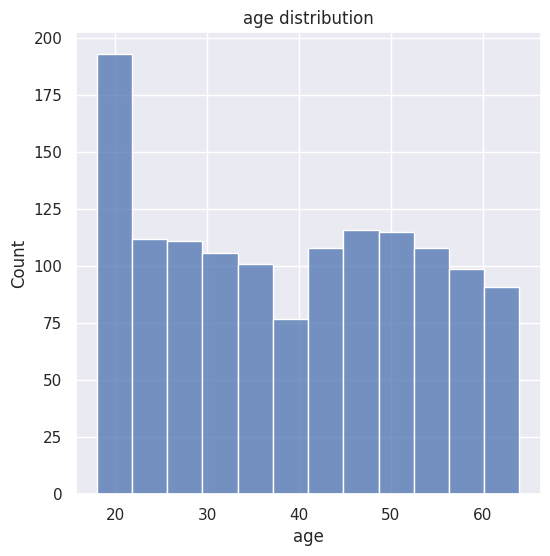

In [ ]:
#distribution of age value
sns.set() # for grids in graph
plt.figure(figsize=(6,6)) # size of figure
sns.histplot(insurance_dataset['age']) # histogram
plt.title('age distribution')
plt.show()

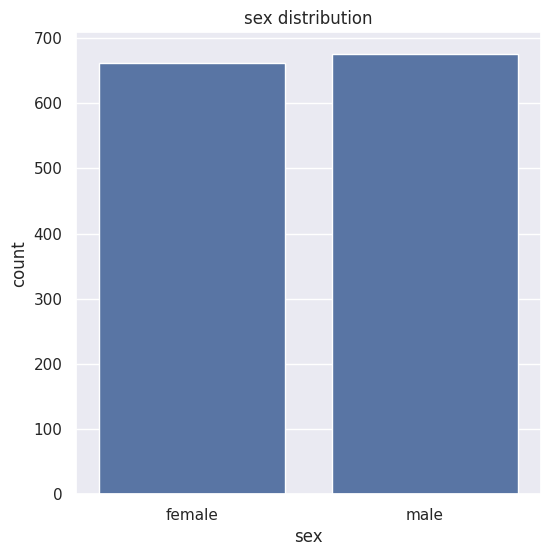

sex
male      675
female    662
Name: count, dtype: int64

In [ ]:
# for categorical data use countplot
plt.figure(figsize=(6,6))
sns.countplot(x="sex",data=insurance_dataset)
plt.title('sex distribution')
plt.show()
insurance_dataset['sex'].value_counts()

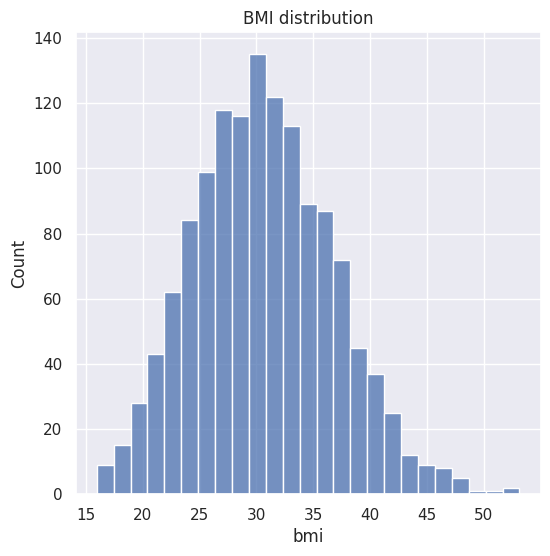

In [ ]:
plt.figure(figsize=(6,6)) # size of figure
sns.histplot(insurance_dataset['bmi']) # histogram
plt.title('BMI distribution')
plt.show()

Normal bmi(body mass index) range 18.5 to 24.9


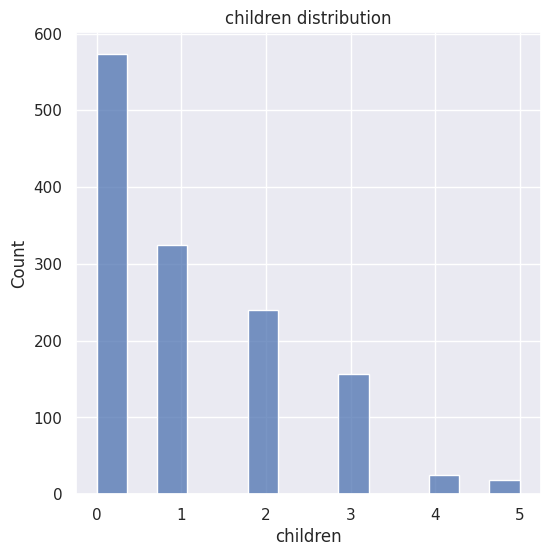

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [ ]:
#children column
plt.figure(figsize=(6,6))
sns.histplot(x="children",data=insurance_dataset)
plt.title('children distribution')
plt.show()
insurance_dataset['children'].value_counts()

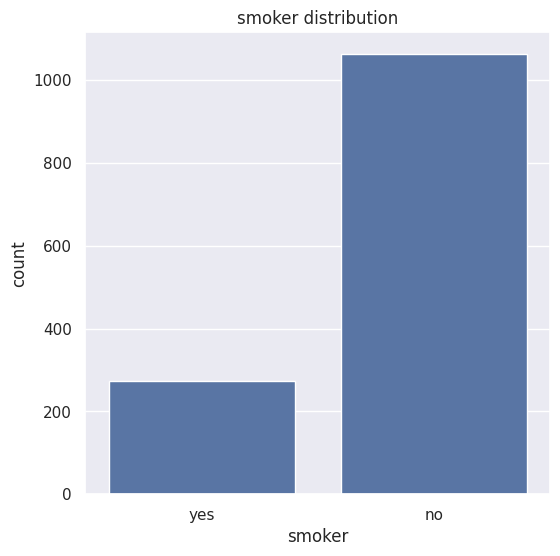

smoker
no     1063
yes     274
Name: count, dtype: int64

In [ ]:
#smoker column
plt.figure(figsize=(6,6))
sns.countplot(x="smoker",data=insurance_dataset)
plt.title('smoker distribution')
plt.show()
insurance_dataset['smoker'].value_counts()

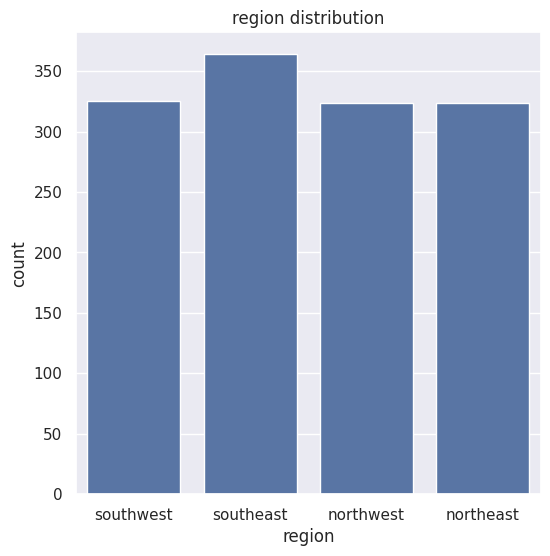

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [ ]:
#region column
plt.figure(figsize=(6,6))
sns.countplot(x="region",data=insurance_dataset)
plt.title('region distribution')
plt.show()
insurance_dataset['region'].value_counts()

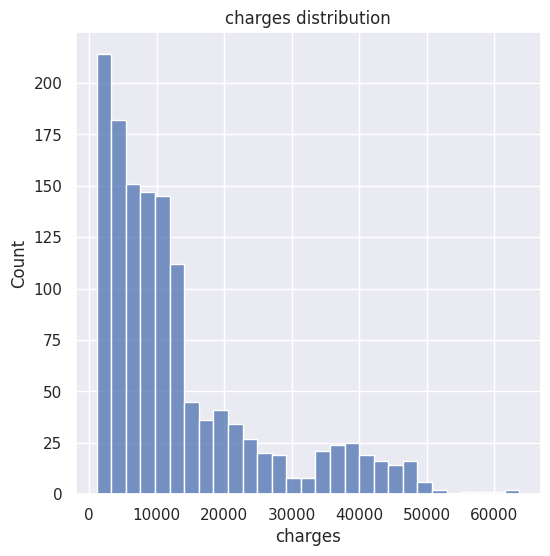

In [ ]:
#charge column
plt.figure(figsize=(6,6))
sns.histplot(x="charges",data=insurance_dataset)
plt.title('charges distribution')
plt.show()


Data preprocessing (cannot feed string data type)
Encoding the categorical features

In [ ]:
#Encode sex column
insurance_dataset.replace({'sex':{'male':1,'female':0}},inplace=True)
#Encode region column
insurance_dataset.replace({'region':{'northeast':0,'northwest':1,'southeast':2,'southwest':3}},inplace=True)
#Encode smoker column
insurance_dataset.replace({'smoker':{'yes':1,'no':0}},inplace=True)

In [ ]:
insurance_dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,1,30.97,3,0,1,10600.5483
1334,18,0,31.92,0,0,0,2205.9808
1335,18,0,36.85,0,0,2,1629.8335
1336,21,0,25.80,0,0,3,2007.9450
1337,61,0,29.07,0,1,1,29141.3603


Split input variable and target variable

In [ ]:
x=insurance_dataset.drop(columns="charges",axis=1)
y=insurance_dataset['charges']
print(x)



      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1337 rows x 6 columns]


In [ ]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64


Splitting data into training and testing

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x.shape,X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(1337, 6) (1069, 6) (268, 6)
(1069,) (268,)


Model training
Linear regression

In [ ]:
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [ ]:
#Prediction for train data
traindata_prediction=regressor.predict(X_train)



In [ ]:
#r square value for train data
r2_train=metrics.r2_score(Y_train,traindata_prediction)
print("r square error for train data:",r2_train)

r square error for train data: 0.7586223702914746


In [ ]:
#Prediction for test data
testdata_prediction=regressor.predict(X_test)

In [ ]:

#r square value for test data
r2_test=metrics.r2_score(Y_test,testdata_prediction)
print("r square error for test data:",r2_test)


r square error for test data: 0.7164204424900908


Build predictive system

In [ ]:
label_encoders = {
    'sex': LabelEncoder(),
    'smoker': LabelEncoder(),
    'region': LabelEncoder()
}

# Example fitting (replace with your actual fit)
label_encoders['sex'].fit(['male', 'female'])
label_encoders['smoker'].fit(['yes', 'no'])
label_encoders['region'].fit(['northeast'  ,'northwest','southeast', 'southwest'])

def get_user_input():
    # Get user input
    age = float(input("Enter age: "))
    sex = input("Enter sex (male/female): ").lower()
    bmi = float(input("Enter BMI: "))
    children = int(input("Enter number of children: "))
    smoker = input("Are you a smoker (yes/no): ").lower()
    region = input("Enter region (northeast/northwest/southeast/southwest): ").lower()

    # Encode categorical features
    sex_encoded = label_encoders['sex'].transform([sex])[0]
    smoker_encoded = label_encoders['smoker'].transform([smoker])[0]
    region_encoded = label_encoders['region'].transform([region])[0]
    print(sex_encoded)
    print(smoker_encoded)
    print(region_encoded)

    # Create DataFrame
    input_df = pd.DataFrame({
        'age': [age],
        'sex': [sex_encoded],
        'bmi': [bmi],
        'children': [children],
        'smoker': [smoker_encoded],
        'region': [region_encoded]
    })

    # Convert to NumPy array and reshape
    input_data_as_numpy_array = input_df.to_numpy()
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

    return input_data_reshaped

def make_prediction(input_data):
    """Function to make a prediction using the trained model."""
    # Assuming 'regressor' is your trained model
    # Replace this with the actual prediction
    prediction = regressor.predict(input_data)

    return prediction

# Main execution
input_data = get_user_input()
prediction = make_prediction(input_data)

print(f"The insurance cost is USD {prediction[0]}")

KeyboardInterrupt: Interrupted by user